In [10]:
from CLogDKPd import CLogDKPd_MGE, CLogDKPd_MGmB, CLogDKPd_MGE_Ordenado, sigmoid, threshold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns
# carregar dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:
# ficar só os 100 primeiros de cada classe
def select_first_n_per_class(x, y, n):
    x_selected = []
    y_selected = []
    
    for digit in np.unique(y):
        idx = np.where(y == digit)[0][:n]
        x_selected.append(x[idx])
        y_selected.append(y[idx])
    
    return np.concatenate(x_selected), np.concatenate(y_selected)

In [12]:
train_filter = np.where((y_train == 0) | (y_train == 1))
test_filter = np.where((y_test == 0) | (y_test == 1))

x_train_0_1, y_train_0_1 = x_train[train_filter], y_train[train_filter]
x_test_0_1, y_test_0_1 = x_test[test_filter], y_test[test_filter]

x_train_0_1, y_train_0_1 = select_first_n_per_class(x_train_0_1, y_train_0_1, 100)
x_test_0_1, y_test_0_1 = select_first_n_per_class(x_test_0_1, y_test_0_1, 100)

x_train_array = x_train_0_1.reshape((len(x_train_0_1), 784))
x_test_array = x_test_0_1.reshape((len(x_test_0_1), 784))
x_train_0_1 = x_train_array.astype('float32')
x_test_0_1 = x_test_array.astype('float32')
x_train_0_1 = np.hstack((np.ones((x_train_0_1.shape[0], 1)), x_train_0_1))
x_test_0_1 = np.hstack((np.ones((x_test_0_1.shape[0], 1)), x_test_0_1))

indices = np.random.permutation(len(x_train_0_1))
x_train_0_1 = x_train_0_1[indices]
y_train_0_1 = y_train_0_1[indices]

train_filter = np.where((y_train == 0) | (y_train == 2))
test_filter = np.where((y_test == 0) | (y_test == 2))

x_train_0_2, y_train_0_2 = x_train[train_filter], y_train[train_filter]
x_test_0_2, y_test_0_2 = x_test[test_filter], y_test[test_filter]

x_train_0_2, y_train_0_2 = select_first_n_per_class(x_train_0_2, y_train_0_2, 100)
x_test_0_2, y_test_0_2 = select_first_n_per_class(x_test_0_2, y_test_0_2, 100)

x_train_array = x_train_0_2.reshape((len(x_train_0_2), 784))
x_test_array = x_test_0_2.reshape((len(x_test_0_2), 784))
x_train_0_2 = x_train_array.astype('float32')
x_test_0_2 = x_test_array.astype('float32')
x_train_0_2 = np.hstack((np.ones((x_train_0_2.shape[0], 1)), x_train_0_2))
x_test_0_2 = np.hstack((np.ones((x_test_0_2.shape[0], 1)), x_test_0_2))
indices = np.random.permutation(len(x_train_0_2))
x_train_0_2 = x_train_0_2[indices]
y_train_0_2 = y_train_0_2[indices]


train_filter = np.where((y_train == 1) | (y_train == 2))
test_filter = np.where((y_test == 1) | (y_test == 2))

x_train_1_2, y_train_1_2 = x_train[train_filter], y_train[train_filter]
x_test_1_2, y_test_1_2 = x_test[test_filter], y_test[test_filter]

x_train_1_2, y_train_1_2 = select_first_n_per_class(x_train_1_2, y_train_1_2, 100)
x_test_1_2, y_test_1_2 = select_first_n_per_class(x_test_1_2, y_test_1_2, 100)

x_train_array = x_train_1_2.reshape((len(x_train_1_2), 784))
x_test_array = x_test_1_2.reshape((len(x_test_1_2), 784))

x_train_1_2 = x_train_array.astype('float32')
x_test_1_2 = x_test_array.astype('float32')
x_train_1_2 = np.hstack((np.ones((x_train_1_2.shape[0], 1)), x_train_1_2))
x_test_1_2 = np.hstack((np.ones((x_test_1_2.shape[0], 1)), x_test_1_2))
indices = np.random.permutation(len(x_train_1_2))
x_train_1_2 = x_train_1_2[indices]
y_train_1_2 = y_train_1_2[indices]


#0_3
train_filter = np.where((y_train == 0) | (y_train == 3))
test_filter = np.where((y_test == 0) | (y_test == 3))

x_train_0_3, y_train_0_3 = x_train[train_filter], y_train[train_filter]
x_test_0_3, y_test_0_3 = x_test[test_filter], y_test[test_filter]

x_train_0_3, y_train_0_3 = select_first_n_per_class(x_train_0_3, y_train_0_3, 100)
x_test_0_3, y_test_0_3 = select_first_n_per_class(x_test_0_3, y_test_0_3, 100)

x_train_array = x_train_0_3.reshape((len(x_train_0_3), 784))
x_test_array = x_test_0_3.reshape((len(x_test_0_3), 784))

x_train_0_3 = x_train_array.astype('float32')
x_test_0_3 = x_test_array.astype('float32')
x_train_0_3 = np.hstack((np.ones((x_train_0_3.shape[0], 1)), x_train_0_3))
x_test_0_3 = np.hstack((np.ones((x_test_0_3.shape[0], 1)), x_test_0_3))
indices = np.random.permutation(len(x_train_0_3))
x_train_0_3 = x_train_0_3[indices]
y_train_0_3 = y_train_0_3[indices]


#1_3
train_filter = np.where((y_train == 1) | (y_train == 3))
test_filter = np.where((y_test == 1) | (y_test == 3))

x_train_1_3, y_train_1_3 = x_train[train_filter], y_train[train_filter]
x_test_1_3, y_test_1_3 = x_test[test_filter], y_test[test_filter]

x_train_1_3, y_train_1_3 = select_first_n_per_class(x_train_1_3, y_train_1_3, 100)
x_test_1_3, y_test_1_3 = select_first_n_per_class(x_test_1_3, y_test_1_3, 100)

x_train_array = x_train_1_3.reshape((len(x_train_1_3), 784))
x_test_array = x_test_1_3.reshape((len(x_test_1_3), 784))

x_train_1_3 = x_train_array.astype('float32')
x_test_1_3 = x_test_array.astype('float32')
x_train_1_3 = np.hstack((np.ones((x_train_1_3.shape[0], 1)), x_train_1_3))
x_test_1_3 = np.hstack((np.ones((x_test_1_3.shape[0], 1)), x_test_1_3))
indices = np.random.permutation(len(x_train_1_3))
x_train_1_3 = x_train_1_3[indices]
y_train_1_3 = y_train_1_3[indices]

#2_3
train_filter = np.where((y_train == 2) | (y_train == 3))
test_filter = np.where((y_test == 2) | (y_test == 3))

x_train_2_3, y_train_2_3 = x_train[train_filter], y_train[train_filter]
x_test_2_3, y_test_2_3 = x_test[test_filter], y_test[test_filter]

x_train_2_3, y_train_2_3 = select_first_n_per_class(x_train_2_3, y_train_2_3, 100)
x_test_2_3, y_test_2_3 = select_first_n_per_class(x_test_2_3, y_test_2_3, 100)

x_train_array = x_train_2_3.reshape((len(x_train_2_3), 784))
x_test_array = x_test_2_3.reshape((len(x_test_2_3), 784))

x_train_2_3 = x_train_array.astype('float32')
x_test_2_3 = x_test_array.astype('float32')
x_train_2_3 = np.hstack((np.ones((x_train_2_3.shape[0], 1)), x_train_2_3))
x_test_2_3 = np.hstack((np.ones((x_test_2_3.shape[0], 1)), x_test_2_3))
indices = np.random.permutation(len(x_train_2_3))
x_train_2_3 = x_train_2_3[indices]
y_train_2_3 = y_train_2_3[indices]

y_train_0_1[y_train_0_1==0]=0
y_train_0_1[y_train_0_1==1]=1



y_train_0_2[y_train_0_2==0]=0
y_train_0_2[y_train_0_2==2]=1


y_train_1_2[y_train_1_2==2]=0
y_train_1_2[y_train_1_2==1]=1


y_train_0_3[y_train_0_3==0]=0
y_train_0_3[y_train_0_3==3]=1


y_train_1_3[y_train_1_3==1]=1
y_train_1_3[y_train_1_3==3]=0


y_train_2_3[y_train_2_3==2]=0
y_train_2_3[y_train_2_3==3]=1

In [13]:
eta = 0.4
epochs = 1000
d=2
batch_size = len(x_train_0_1)
alpha = np.zeros(len(x_train_0_1))
#alpha_0_1, E_0_1 = CLogDKPd_MGmB(x_train_0_1, y_train_0_1, alpha, eta, epochs, d, batch_size)
#alpha_0_1, E_0_1 = CLogDKPd_MGE(x_train_0_1, y_train_0_1, alpha, eta, epochs, d)
alpha_0_1, E_0_1 = CLogDKPd_MGE_Ordenado(x_train_0_1, y_train_0_1, alpha, eta, epochs, d)
alpha = np.zeros(len(x_train_0_2))
#alpha_0_2, E_0_2 = CLogDKPd_MGmB(x_train_0_2, y_train_0_2, alpha, eta, epochs, d, batch_size)
#alpha_0_2, E_0_2 = CLogDKPd_MGE(x_train_0_2, y_train_0_2, alpha, eta, epochs, d)
alpha_0_2, E_0_2 = CLogDKPd_MGE_Ordenado(x_train_0_2, y_train_0_2, alpha, eta, epochs, d)
alpha = np.zeros(len(x_train_1_2))
#alpha_1_2, E_1_2 = CLogDKPd_MGmB(x_train_1_2, y_train_1_2, alpha, eta, epochs, d, batch_size)
#alpha_1_2, E_1_2 = CLogDKPd_MGE(x_train_1_2, y_train_1_2, alpha, eta, epochs, d)
alpha_1_2, E_1_2 = CLogDKPd_MGE_Ordenado(x_train_1_2, y_train_1_2, alpha, eta, epochs, d)
alpha = np.zeros(len(x_train_0_3))
#alpha_0_3, E_0_3 = CLogDKPd_MGmB(x_train_0_3, y_train_0_3, alpha, eta, epochs, d, batch_size)
#alpha_0_3, E_0_3 = CLogDKPd_MGE(x_train_0_3, y_train_0_3, alpha, eta, epochs, d)
alpha_0_3, E_0_3 = CLogDKPd_MGE_Ordenado(x_train_0_3, y_train_0_3, alpha, eta, epochs, d)
alpha = np.zeros(len(x_train_1_3))
#alpha_1_3, E_1_3 = CLogDKPd_MGmB(x_train_1_3, y_train_1_3, alpha, eta, epochs, d, batch_size)
#alpha_1_3, E_1_3 = CLogDKPd_MGE(x_train_1_3, y_train_1_3, alpha, eta, epochs, d)
alpha_1_3, E_1_3 = CLogDKPd_MGE_Ordenado(x_train_1_3, y_train_1_3, alpha, eta, epochs, d)
alpha = np.zeros(len(x_train_2_3))
#alpha_2_3, E_2_3 = CLogDKPd_MGmB(x_train_2_3, y_train_2_3, alpha, eta, epochs, d, batch_size)
#alpha_2_3, E_2_3 = CLogDKPd_MGE(x_train_2_3, y_train_2_3, alpha, eta, epochs, d)
alpha_2_3, E_2_3 = CLogDKPd_MGE_Ordenado(x_train_2_3, y_train_2_3, alpha, eta, epochs, d)

In [14]:
X_testes = np.concatenate((x_test_0_1, x_test_0_2, x_test_1_2,x_test_0_3,x_test_1_3,x_test_2_3), axis=0)

Y_testes= np.concatenate((y_test_0_1, y_test_0_2, y_test_1_2,y_test_0_3,y_test_1_3,y_test_2_3), axis=0)

previsoes = []
for i in range(len(X_testes)):
    elemento = X_testes[i]
    p_chapeu =0
    for i in range(len(x_train_0_1)):
        p_chapeu += (alpha_0_1[i] * (np.dot(elemento,x_train_0_1[i])**d) )
    previsao_0_1 = (sigmoid(p_chapeu))
    p_chapeu =0
    for i in range(len(x_train_0_2)):
        p_chapeu += (alpha_0_2[i] * (np.dot(elemento,x_train_0_2[i])**d) )
    previsao_0_2 = (sigmoid(p_chapeu))
    p_chapeu =0
    for i in range(len(x_train_1_2)):
        p_chapeu += (alpha_1_2[i] * (np.dot(elemento,x_train_1_2[i])**d) )
    previsao_1_2 = (sigmoid(p_chapeu))


    p_chapeu =0
    for i in range(len(x_train_0_3)):
        p_chapeu += (alpha_0_3[i] * (np.dot(elemento,x_train_0_3[i])**d) )
    previsao_0_3 = (sigmoid(p_chapeu))
    
    p_chapeu =0
    for i in range(len(x_train_1_3)):
        p_chapeu += (alpha_1_3[i] * (np.dot(elemento,x_train_1_3[i])**d) )
    previsao_1_3 = (sigmoid(p_chapeu))

    p_chapeu =0
    for i in range(len(x_train_2_3)):
        p_chapeu += (alpha_2_3[i] * (np.dot(elemento,x_train_2_3[i])**d) )
    previsao_2_3 = (sigmoid(p_chapeu))

    pontuacao = [0.0, 0.0, 0.0,0.0, 0.0, 0.0]

    # Update scores based on predictions
    if threshold(previsao_0_1) == 0:
        pontuacao[0] += 1 + previsao_0_1
    if threshold(previsao_0_2) == 0:
        pontuacao[0] += 1 + previsao_0_2
    if threshold(previsao_0_3) == 0:
        pontuacao[0] += 1 + previsao_0_3

    if threshold(previsao_0_1) == 1:
        pontuacao[1] += previsao_0_1
    if threshold(previsao_1_2) == 1:
        pontuacao[1] += previsao_1_2
    if threshold(previsao_1_3) == 1:
        pontuacao[1] += previsao_1_3

    if threshold(previsao_1_2) == 0:
        pontuacao[2] += 1 + previsao_1_2
    if threshold(previsao_0_2) == 1:
        pontuacao[2] += previsao_0_2
    if threshold(previsao_2_3) == 0:
        pontuacao[2] += 1 + previsao_2_3
        
    if threshold(previsao_0_3) == 1:
        pontuacao[3] +=  previsao_0_3
    if threshold(previsao_1_3) == 0:
        pontuacao[3] += 1 + previsao_1_3
    if threshold(previsao_2_3) == 1:
        pontuacao[3] +=  previsao_2_3
    a=(np.argmax(pontuacao))
    previsoes.append(a)

Accuracy: 0.94
Precision: 0.94
Recall: 0.93
F1 Score: 0.94


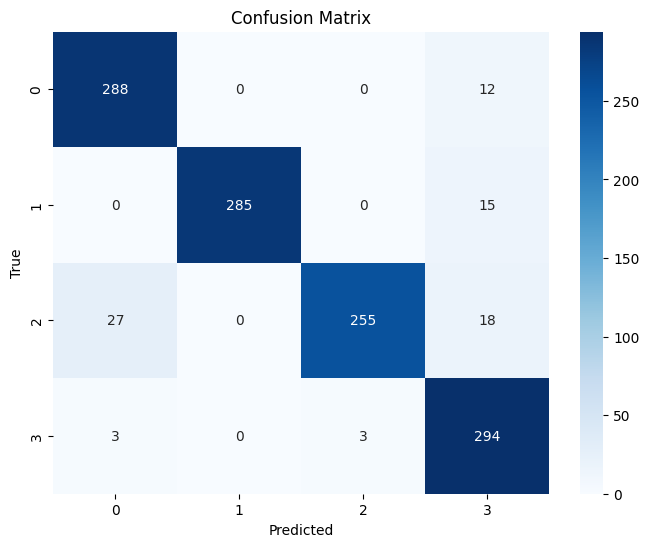

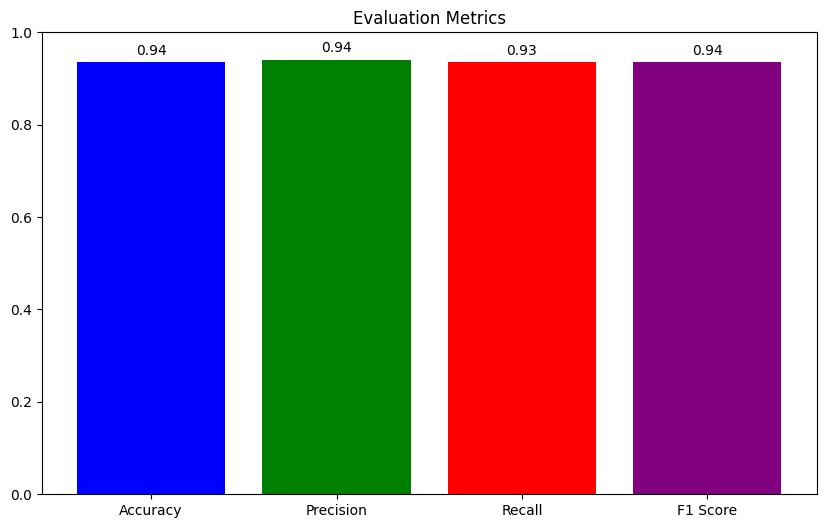


Classification Report:
               precision    recall  f1-score   support

     Class 0       0.91      0.96      0.93       300
     Class 1       1.00      0.95      0.97       300
     Class 2       0.99      0.85      0.91       300
     Class 3       0.87      0.98      0.92       300

    accuracy                           0.94      1200
   macro avg       0.94      0.93      0.94      1200
weighted avg       0.94      0.94      0.94      1200



In [15]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que Y_testes e previsoes já estejam definidos
# Y_testes = np.array([...])
# previsoes = np.array([...])

# Calculando as métricas
accuracy = accuracy_score(Y_testes, previsoes)
precision = precision_score(Y_testes, previsoes, average='macro')
recall = recall_score(Y_testes, previsoes, average='macro')
f1 = f1_score(Y_testes, previsoes, average='macro')

# Imprimindo as métricas
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Matriz de confusão
conf_matrix = confusion_matrix(Y_testes, previsoes)

# Gráfico da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y_testes), yticklabels=np.unique(Y_testes))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Gráfico das métricas
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red', 'purple'])
plt.ylim(0, 1)
plt.title('Evaluation Metrics')

# Adicionando os valores a cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.show()

# Nomes das classes dinamicamente
classes = np.unique(Y_testes)
class_names = [f'Class {cls}' for cls in classes]

# Relatório de classificação completo
report = classification_report(Y_testes, previsoes, target_names=class_names)
print('\nClassification Report:\n', report)
